# Import Statement

In [1]:
import findspark
from pyspark.sql.functions import lit
from pyspark.sql.functions import col
from pyspark.conf import SparkConf

import pandas as pd

# Start Spark with init()

In [2]:
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession # SparkSession is the entry of your application to a Spark cluster
conf = SparkConf().setAppName("A2")\
                  .set("spark.driver.memory", "8g")\
                  .set("spark.executor.memory", "8g")
spark = SparkSession.builder.config(conf=conf).getOrCreate()
spark

In [3]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# Read in data using PySpark

#### inferSchema

Infer schema will automatically guess the data types for each field. If we set this option to TRUE, the API will read some sample records from the file to infer the schema. If we want to set this value to false, we must specify a schema explicitly.

In [4]:
df = spark.read.csv('data.csv', header = True, inferSchema = True)
df

DataFrame[id: int, member_id: int, loan_amnt: int, funded_amnt: int, funded_amnt_inv: double, term: string, int_rate: double, installment: double, grade: string, sub_grade: string, emp_title: string, emp_length: string, home_ownership: string, annual_inc: string, verification_status: string, issue_d: string, pymnt_plan: string, desc: string, purpose: string, title: string, zip_code: string, addr_state: string, dti: string, delinq_2yrs: string, earliest_cr_line: string, inq_last_6mths: string, mths_since_last_delinq: string, mths_since_last_record: string, open_acc: string, pub_rec: string, revol_bal: string, revol_util: string, total_acc: string, initial_list_status: string, out_prncp: string, out_prncp_inv: string, total_pymnt: string, total_pymnt_inv: string, total_rec_prncp: string, total_rec_int: string, total_rec_late_fee: string, recoveries: string, collection_recovery_fee: string, last_pymnt_d: string, last_pymnt_amnt: string, next_pymnt_d: string, last_credit_pull_d: string, co

# Data Description

In [6]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))

Number of rows:  855969
Number of columns:  73


# Data Overview

### 1. Check data type

##### printSchema()

By using printSchema(), we can  print or display the schema of the DataFrame or Dataset in the tree format along with column name and data type.

## Check the data types

In [3]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- member_id: integer (nullable = true)
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- earliest

### 2. Check names of each column

In [4]:
#Column names
df.columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 '

### 3. Show summary statistics of numeric columns

##### By using describe() function, we can find some features as below :
- string value types : Need to be encoded to numerical values
- missing values : Need to do data preprocessing with some functions
- data values : Need to be dropped due to irrelvant properties for prediction
- identical values : Need to be dropped due to identifiers, which cause decreasing accuracy of model

In [5]:
df.describe().show(vertical=True)

-RECORD 0-------------------------------------------
 summary                     | count                
 id                          | 855969               
 member_id                   | 855969               
 loan_amnt                   | 855969               
 funded_amnt                 | 855969               
 funded_amnt_inv             | 855969               
 term                        | 855969               
 int_rate                    | 855969               
 installment                 | 855969               
 grade                       | 855969               
 sub_grade                   | 855969               
 emp_title                   | 806530               
 emp_length                  | 855969               
 home_ownership              | 855969               
 annual_inc                  | 855969               
 verification_status         | 855969               
 issue_d                     | 855969               
 pymnt_plan                  | 855969         

# Data Preprocessing

### 1. Drop unnecessary Columns

Following 9 columns are individual attributes to support identifying each id and can be considered as multiple identifier. Therefore, we doppred the 9 columns, because it might cause lower accuracy of prediction and long running time of modeling and tuning.

In [5]:
df = df.drop('id', 'member_id', 'desc', 'title', 'emp_title', 'emp_length', 'pymnt_plan', 'zip_code', 'addr_state' )

In [10]:
#Column names
df.columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',

In [9]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))

Number of rows:  855969
Number of columns:  64


### After drop 

We can see that the number of columns are reduced from 73 to 64 with the same number of rows.

### 2. Identify missing values and outliers

By using pyspark.sql.functions, we can use lists of built-in functions available for DataFrame. PySpark SQL provides more information about the structure of data and its computation. In this library, we are going to use isnan() to check missing values, count(), when and col functions from sql.

In [6]:
from pyspark.sql.functions import count, when, col

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0-----------------------------
 loan_amnt                   | 0      
 funded_amnt                 | 0      
 funded_amnt_inv             | 0      
 term                        | 0      
 int_rate                    | 0      
 installment                 | 0      
 grade                       | 0      
 sub_grade                   | 0      
 home_ownership              | 0      
 annual_inc                  | 0      
 verification_status         | 0      
 issue_d                     | 0      
 purpose                     | 1      
 dti                         | 1      
 delinq_2yrs                 | 1      
 earliest_cr_line            | 1      
 inq_last_6mths              | 1      
 mths_since_last_delinq      | 439669 
 mths_since_last_record      | 724613 
 open_acc                    | 72     
 pub_rec                     | 57     
 revol_bal                   | 47     
 revol_util                  | 475    
 total_acc                   | 17     
 initial_list_status     

In [7]:
from pyspark.sql.functions import isnan, when, count, col
import pandas as pd

# Assume `df` is your PySpark DataFrame
missing_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

# Compute percentage missing values
missing_percentages = (missing_counts / df.count()) * 100

# Format output for display
styled_output = missing_percentages.style.format("{:.2f}%").background_gradient(cmap='Blues', low=0, high=1)

# Display output
styled_output


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,51.37%,84.65%,0.01%,0.01%,0.01%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.04%,0.00%,29.53%,0.01%,0.01%,75.08%,0.01%,0.01%,99.93%,99.93%,99.94%,0.02%,7.85%,7.85%,98.44%,98.44%,98.44%,98.44%,98.49%,98.44%,98.64%,98.45%,98.45%,98.45%,98.45%,7.86%,98.45%,98.45%,98.45%,0.03%


### 3. Drop columns which have more than 25% of values missing

Since, we still have more than 60 columns with relatively low correlations against the target value, we set a threshold to drop columns, which have more than 25% of missing values.

In [8]:
# calculate the percentage of missing values for each column
missing_percentage = {col: (df.filter(df[col].isNull()).count() / df.count())*100 for col in df.columns}

# specify a threshold for the maximum percentage of missing values
threshold = 25

# create a list of column names to drop
cols_to_drop = [col for col, percentage in missing_percentage.items() if percentage > threshold]

# drop the columns with high percentage of missing values
df = df.drop(*cols_to_drop)

In [9]:
# Assume `df` is your PySpark DataFrame
missing_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

# Compute percentage missing values
missing_percentages = (missing_counts / df.count()) * 100

# Format output for display
styled_output = missing_percentages.style.format("{:.2f}%").background_gradient(cmap='Blues', low=0, high=1)

# Display output
styled_output


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.01%,0.01%,0.06%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.04%,0.00%,0.01%,0.01%,0.01%,0.01%,0.02%,7.85%,7.85%,7.86%,0.03%


In [15]:
df.printSchema()

root
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- earliest_cr_line: string (nullable = true)
 |-- inq_last_6mths: string (nullable = true)
 |-- open_acc: string (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_bal: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- out_prncp: string

In [15]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))

Number of rows:  855969
Number of columns:  43


### After drop 

We can see that the number of columns are reduced from 64 to 43 with the same number of rows.

### 4. Drop rows  where it is null

In [10]:
df = df.dropna()

In [17]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))

Number of rows:  779489
Number of columns:  43


### After drop 

We can see that the number of rows are reduced from 855969 to 779489 with the same number of columns.

In [11]:
missing_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas()

# Compute percentage missing values
missing_percentages = (missing_counts / df.count()) * 100

# Format output for display
styled_output = missing_percentages.style.format("{:.2f}%").background_gradient(cmap='Blues', low=0, high=1)

# Display output
styled_output


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


### Now, we can see through the dataframe 'styled_output' that all the columns have 0% of missing values.

### 5. Drop date features

By using to_date function from pyspark.sql.functions library, we can locate columnes containing date data types.

In [12]:
from pyspark.sql.functions import to_date

date_columns = ['issue_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']

#Drop original date columns
df = df.drop(*date_columns)

In [13]:
from pyspark.sql.functions import count, when, col

# Check for missing values in all columns
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)


-RECORD 0-------------------------
 loan_amnt                  | 0   
 funded_amnt                | 0   
 funded_amnt_inv            | 0   
 term                       | 0   
 int_rate                   | 0   
 installment                | 0   
 grade                      | 0   
 sub_grade                  | 0   
 home_ownership             | 0   
 annual_inc                 | 0   
 verification_status        | 0   
 purpose                    | 0   
 dti                        | 0   
 delinq_2yrs                | 0   
 inq_last_6mths             | 0   
 open_acc                   | 0   
 pub_rec                    | 0   
 revol_bal                  | 0   
 revol_util                 | 0   
 total_acc                  | 0   
 initial_list_status        | 0   
 out_prncp                  | 0   
 out_prncp_inv              | 0   
 total_pymnt                | 0   
 total_pymnt_inv            | 0   
 total_rec_prncp            | 0   
 total_rec_int              | 0   
 total_rec_late_fee 

In [20]:
df.printSchema()

root
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: string (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- dti: string (nullable = true)
 |-- delinq_2yrs: string (nullable = true)
 |-- inq_last_6mths: string (nullable = true)
 |-- open_acc: string (nullable = true)
 |-- pub_rec: string (nullable = true)
 |-- revol_bal: string (nullable = true)
 |-- revol_util: string (nullable = true)
 |-- total_acc: string (nullable = true)
 |-- initial_list_status: string (nullable = true)
 |-- out_prncp: string (nullable = true)
 |-- out_prncp_inv: string (nullable = true)
 |-- total_pymnt: strin

In [21]:
print('Number of rows: ', df.count())
print('Number of columns: ', len(df.columns))

Number of rows:  779489
Number of columns:  39


### After drop 

We can see that the number of columns are reduced from 43 to 39 with the same number of rows.

### 6. Encode categorical columns

Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm's performances vary based on how Categorical variables are encoded.


StringIndexer

- A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). By default, this is ordered by label frequencies so the most frequent label gets index 0.

In [14]:
from pyspark.ml.feature import StringIndexer

categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
                   'inq_last_6mths', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                   'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                   'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'application_type',
                   'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'term']

for col in categorical_cols:
    indexer = StringIndexer(inputCol=col, outputCol=col+"_indexed")
    model = indexer.fit(df)
    df = model.transform(df).drop(col)
    df = df.withColumnRenamed(col+"_indexed", col)



In [22]:
df.printSchema()

root
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: double (nullable = true)
 |-- int_rate: double (nullable = true)
 |-- installment: double (nullable = true)
 |-- default_ind: integer (nullable = true)
 |-- grade: double (nullable = false)
 |-- sub_grade: double (nullable = false)
 |-- home_ownership: double (nullable = false)
 |-- annual_inc: double (nullable = false)
 |-- verification_status: double (nullable = false)
 |-- purpose: double (nullable = false)
 |-- dti: double (nullable = false)
 |-- delinq_2yrs: double (nullable = false)
 |-- inq_last_6mths: double (nullable = false)
 |-- open_acc: double (nullable = false)
 |-- pub_rec: double (nullable = false)
 |-- revol_bal: double (nullable = false)
 |-- revol_util: double (nullable = false)
 |-- total_acc: double (nullable = false)
 |-- initial_list_status: double (nullable = false)
 |-- out_prncp: double (nullable = false)
 |-- out_prncp_inv: double (nullable = false

### Now, we can see all the remaining features are numerical data types as either integer or double. 

# Define new feature using User-Defined Transform functionality

### New feature to be defined is isPayment to Income Ratio under the column name 'PTI'. This could be calculated as the ratio of the total monthly loan payments (installment) to the borrower's monthly income (annual_inc / 12). This could give an indication of the borrower's ability to make their loan payments on time.

In [15]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

def calculate_pti(installment, annual_inc):
    if annual_inc == 0:
        return None
    else:
        return installment / (annual_inc / 12)


calculate_pti_udf = udf(calculate_pti, DoubleType())

# Add a new column "pti" to the DataFrame
df = df.withColumn("pti", calculate_pti_udf("installment", "annual_inc"))


In [24]:
#Check values of dti column
df.select('pti').describe().show()

+-------+--------------------+
|summary|                 pti|
+-------+--------------------+
|  count|              749362|
|   mean|   533.8208889010727|
| stddev|  1053.5183845773388|
|    min|0.008552075648849843|
|    max|             11406.0|
+-------+--------------------+



### There are some missing values at 'pti' column, because the dataset 'df' has 779489 rows but this column has 749362. Therefore, we decided to fill in missing values with 0.

In [16]:
#Fill null values with 0
df = df.fillna({'pti': 0})

In [26]:
#Check values of dti column
df.select('pti').describe().show()

+-------+------------------+
|summary|               pti|
+-------+------------------+
|  count|            779489|
|   mean| 513.1888826509246|
| stddev|1038.0711652150471|
|    min|               0.0|
|    max|           11406.0|
+-------+------------------+



### Now, we can see the count number of pti column has the same lenghth as dataset 'df' with 779489.

# Data Analysis

By visualizing each column of dataset, we can obtain insight as below :
- Find the same or similar pattenrns
- Positive or negative skewness
- Find identical values, which can be dropped for prediction model

### 1. Visualize the distribution of target column (default_ind)

### To visualize and analyze properties and tendencies of each column, we used matplot library.

By plotting the target values of 'default_ind' column, we can gain insight that the value distribution of 'default_ind' is obviously biased towards 0. We can assume that more than 90% of target values from dataset are recorded as 0.

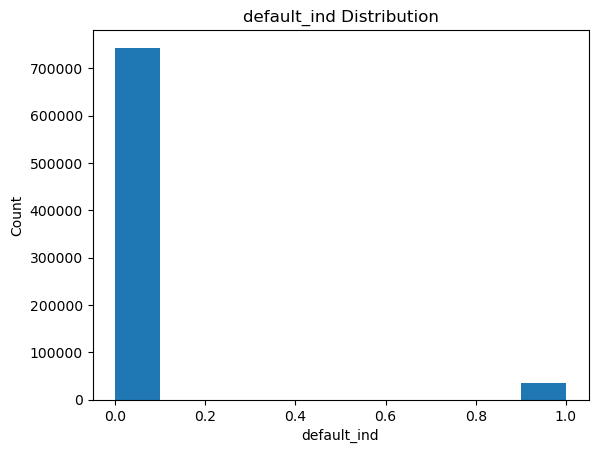

In [27]:
import matplotlib.pyplot as plt

df_pd = df.toPandas()

# Plot histogram of default_ind
plt.hist(df_pd["default_ind"])
plt.title("default_ind Distribution")
plt.xlabel("default_ind")
plt.ylabel("Count")
plt.show()

### 2. Visualize the distribution of each feature

### By plotting all the 39 features of dataset, we can conclude data analysis as below :

- Most of the features are negatively skewed (also known as left-skewed). It represents that the left tail is long relative to the right tail, meaning that most of the values are concentrated at the left side or at the center.
- Some columns such as 'default_ind' and 'initial_list_status' represent bimodal distribution, because the values are classified as binary, consisting of only 2 values.
- 'annual_inc', 'delinq_2yrs' and 'pub_ruc' columns are tend to be extremely biased towards only 1 value.

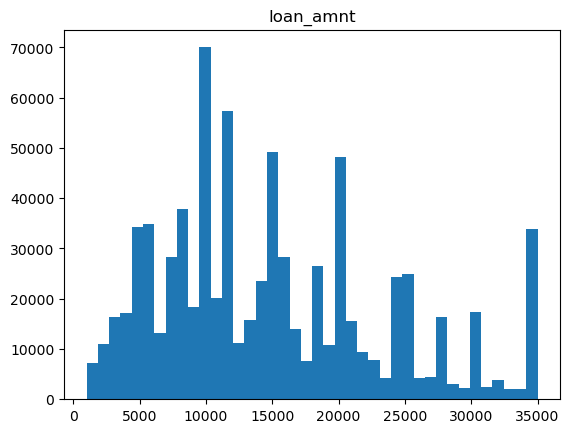

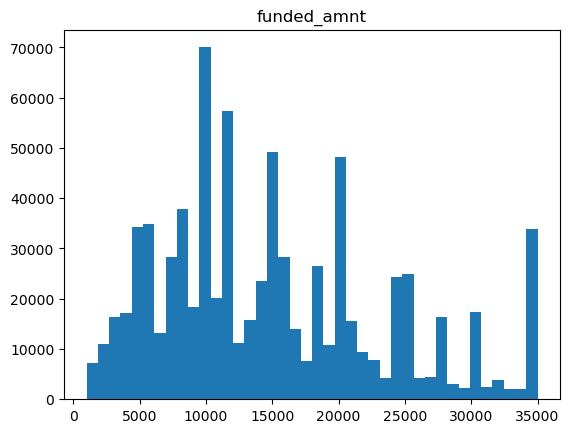

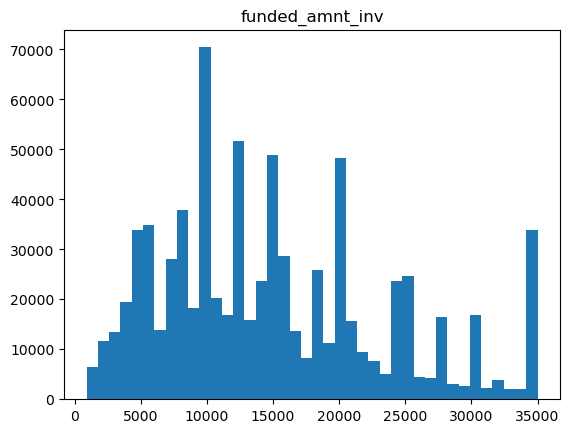

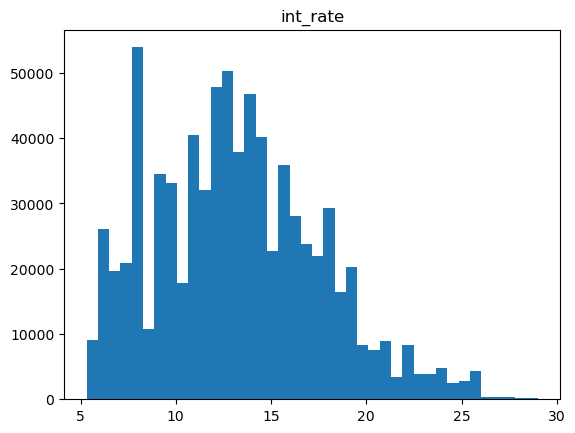

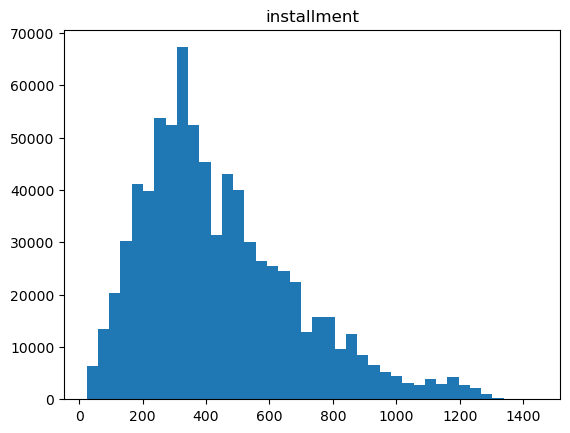

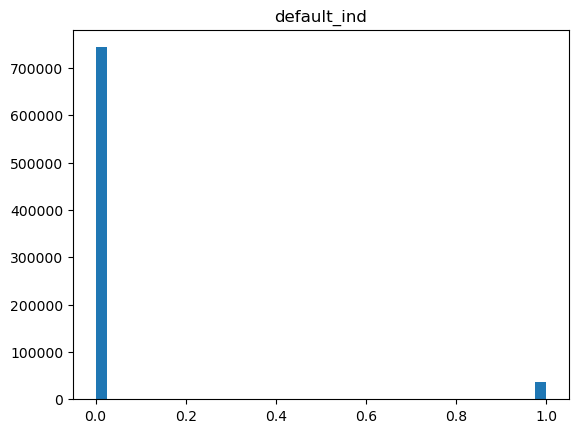

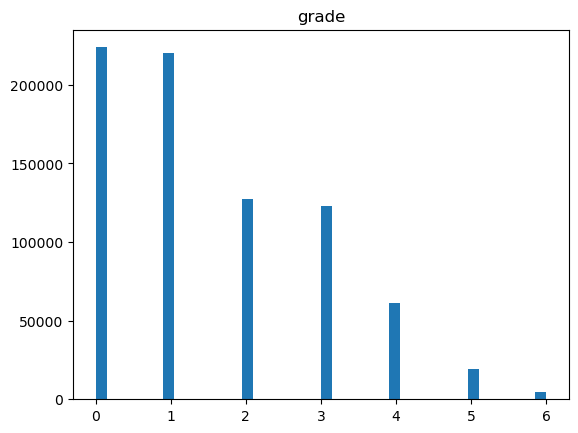

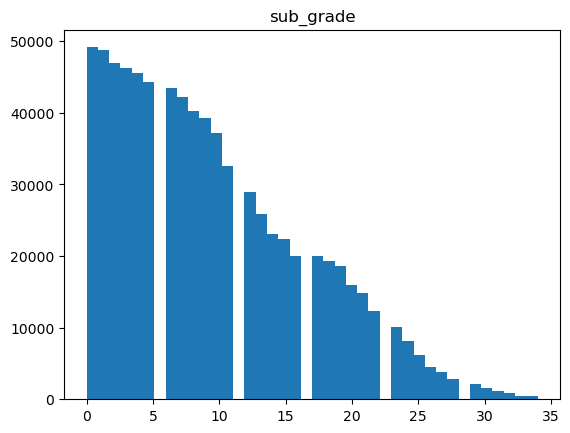

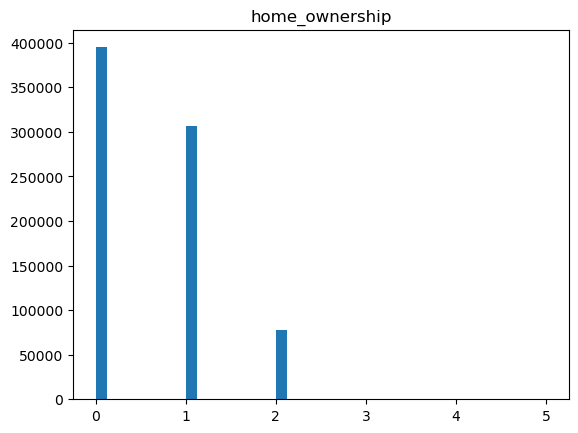

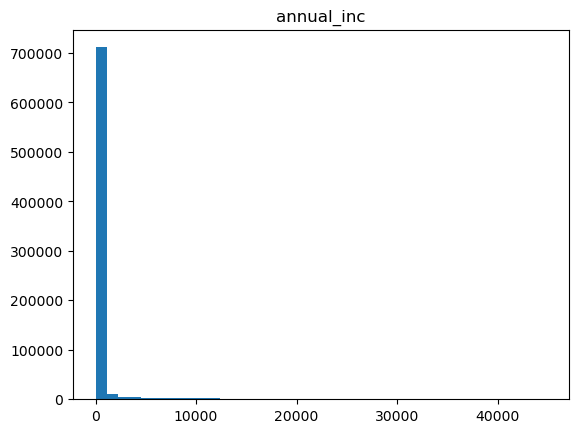

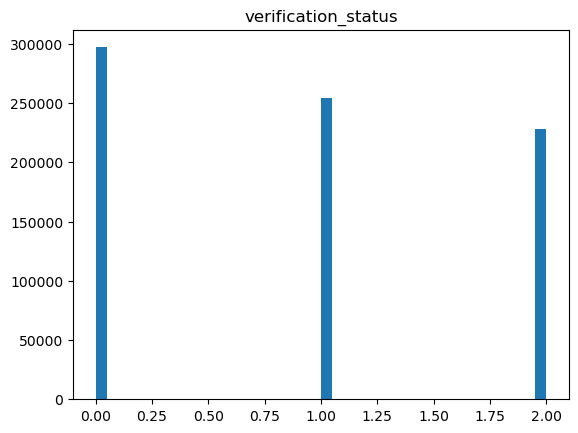

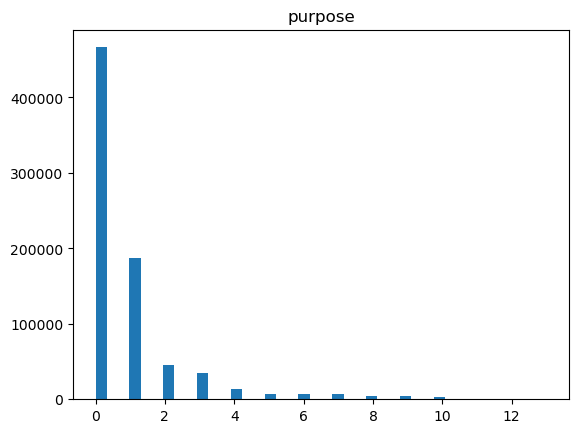

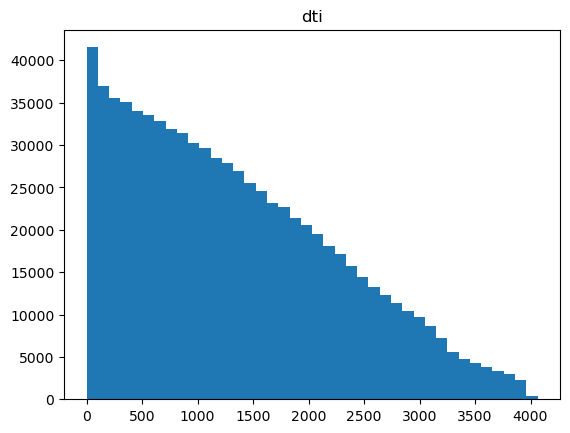

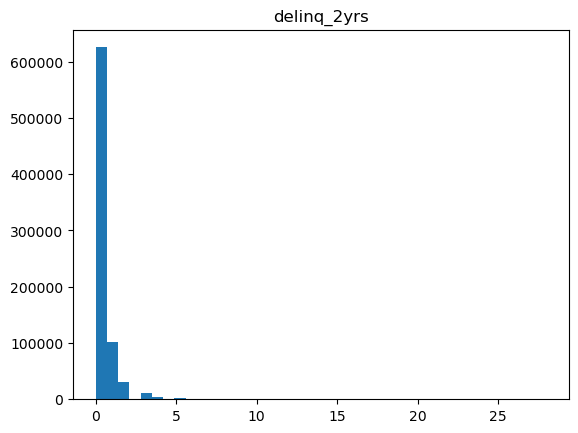

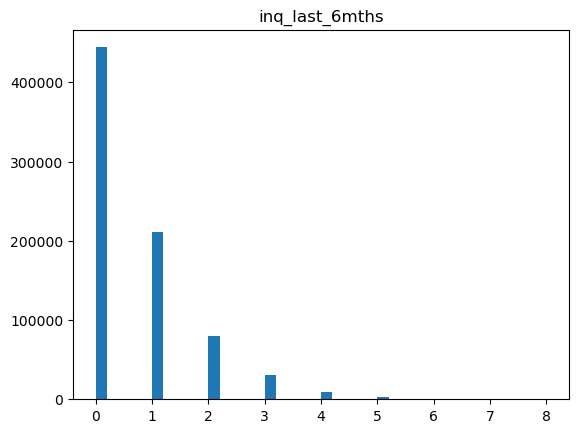

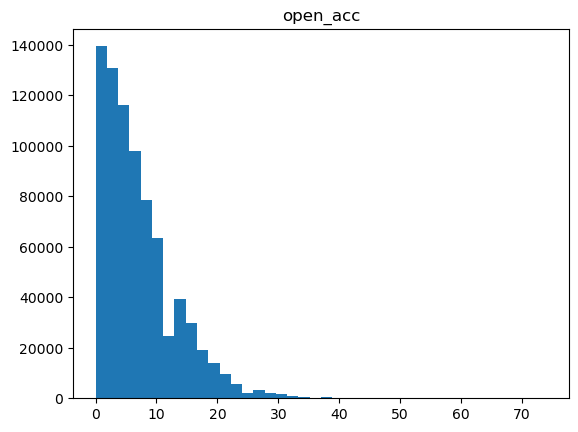

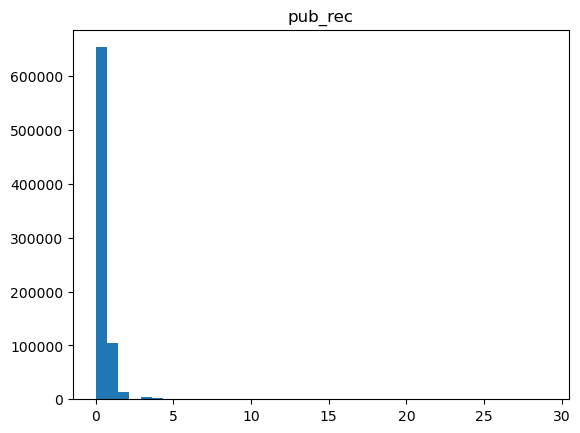

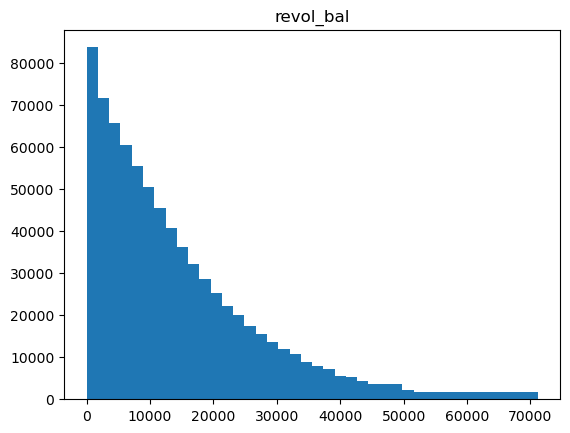

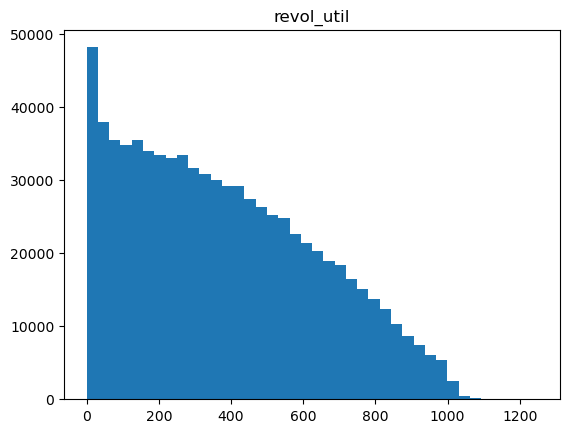

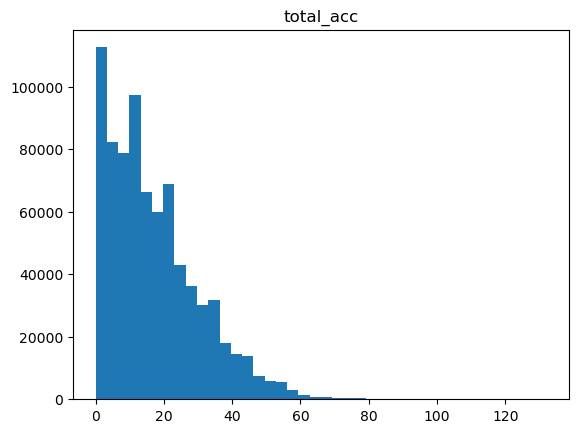

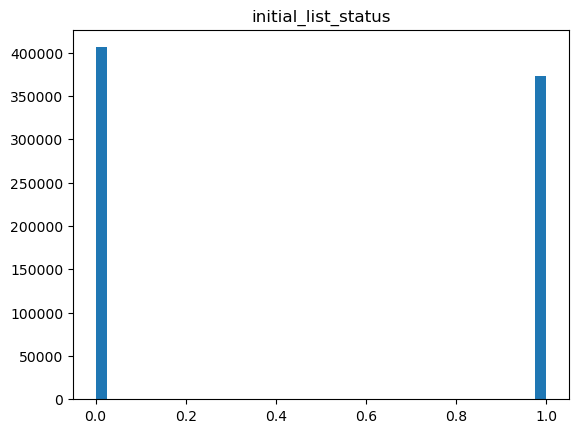

In [ ]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# assuming your DataFrame is named 'df'
summary = df.describe().toPandas().transpose()

for col in df.columns:
    if col != 'id':  # replace 'id' with the name of your identifier column, if you have one
        data = df.select(col).rdd.flatMap(lambda x: x).collect()
        plt.hist(data, bins=40)
        plt.title(col)
        plt.show()

### 3. Visualize the correlation of 39 columns to each other

By using seaborn library, we can visualize heatmap of correlation matrix.

In [18]:
import seaborn as sn

df_pd = df.toPandas()

# Get correlation of 39 columns
corr_matrix = df_pd.corr(method = 'pearson').abs()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,default_ind,grade,sub_grade,home_ownership,annual_inc,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term,pti
loan_amnt,1.000000,0.999999,0.999994,0.124412,0.944545,0.001372,0.146342,0.133538,0.153894,0.019949,...,0.012520,0.020778,NaN,0.009715,0.001718,0.041255,0.273661,0.099278,0.411704,0.132749
funded_amnt,0.999999,1.000000,0.999995,0.124410,0.944547,0.001365,0.146339,0.133536,0.153893,0.019950,...,0.012524,0.020778,NaN,0.009715,0.001718,0.041255,0.273659,0.099277,0.411702,0.132750
funded_amnt_inv,0.999994,0.999995,1.000000,0.124308,0.944531,0.001361,0.146279,0.133471,0.153896,0.019940,...,0.012586,0.020792,NaN,0.009684,0.001705,0.041260,0.273672,0.099239,0.411675,0.132718
int_rate,0.124412,0.124410,0.124308,1.000000,0.111296,0.160628,0.638902,0.460253,0.049459,0.028516,...,0.118890,0.012272,NaN,0.008605,0.026865,0.010274,0.073103,0.033082,0.425721,0.042375
installment,0.944545,0.944547,0.944531,0.111296,1.000000,0.014102,0.139426,0.134605,0.127727,0.017687,...,0.028819,0.018126,NaN,0.007882,0.004613,0.036215,0.243235,0.098637,0.141356,0.145162
default_ind,0.001372,0.001365,0.001361,0.160628,0.014102,1.000000,0.088853,0.069091,0.016523,0.000416,...,0.046846,0.007734,NaN,0.004806,0.000977,0.013504,0.030224,0.007507,0.026174,0.017335
grade,0.146342,0.146339,0.146279,0.638902,0.139426,0.088853,1.000000,0.870754,0.018015,0.016701,...,0.047892,0.003478,NaN,0.008087,0.014265,0.003516,0.007209,0.011376,0.311820,0.031143
sub_grade,0.133538,0.133536,0.133471,0.460253,0.134605,0.069091,0.870754,1.000000,0.001494,0.012235,...,0.043749,0.001793,NaN,0.005670,0.007926,0.008988,0.017359,0.003237,0.234079,0.026364
home_ownership,0.153894,0.153893,0.153896,0.049459,0.127727,0.016523,0.018015,0.001494,1.000000,0.007653,...,0.015752,0.006260,NaN,0.006522,0.011145,0.002745,0.359490,0.042213,0.087853,0.006274
annual_inc,0.019949,0.019950,0.019940,0.028516,0.017687,0.000416,0.016701,0.012235,0.007653,1.000000,...,0.013839,0.004423,NaN,0.006408,0.002093,0.005153,0.002802,0.001163,0.018081,0.119534


<AxesSubplot:>

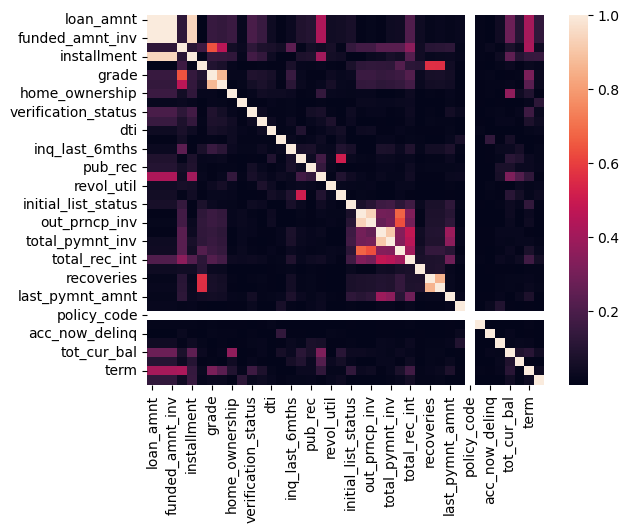

In [19]:
sn.heatmap(corr_matrix)

### Correlation analysis

corr() function supports to obtain calculated correlation outputs based on each column. Through the heatmap, we can discover some features as below :
    
- 1.0 to 0.9 : 3 columns of loan_amnt ,funded_amnt_inv and installment represent the highest correlations to each other
- 0.8 to 0.9 : Columns of these 3 sets (initial_list_status, out_prncp) , (out_prncp, total_pymnt_inv), (recoveries, last_pymnt_amnt) represent the second highest correlations to each other.
- However, mostly, their correlations are low, meaning that they do not have high contingency.

# Using VectorAssembler to combine multiple columns into a single vector 

VectorAssembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector, especially for training ML models like logistic regression and decision trees

In [20]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["loan_amnt", "funded_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "grade", "sub_grade", "home_ownership", "annual_inc", "verification_status", "purpose", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim", "pti"],
    outputCol="features")

df_assembled = assembler.transform(df).select("features", "default_ind")


In [29]:
df_assembled.head()

Row(features=SparseVector(39, {0: 27050.0, 1: 27050.0, 2: 27050.0, 4: 10.99, 5: 885.46, 7: 6.0, 8: 2.0, 9: 8.0, 10: 1.0, 12: 1348.0, 15: 8.0, 17: 37439.0, 18: 64.0, 19: 11.0, 21: 58760.0, 22: 61318.0, 23: 222686.0, 24: 229799.0, 25: 109654.0, 26: 235141.0, 30: 187828.0, 36: 62196.0, 37: 580.0, 38: 1328.19}), default_ind=0)

# Split the pre-processed data for train and test dataset

* By using sampleBy() function, we stratified dataset into 2/3 for training dataset and 1/3 for testing dataset
* Also, by setting seed to 42, we shuffled the orders of samples randomly to prevent having duplicated data rows in each dataset
* By susing subtract() function, the remaining datset from training datset is stratified into testing dataset.

In [21]:
# Split the data into training and test sets using stratified sampling
stratify_by = "default_ind"
fractions = {row[stratify_by]: 0.67 for row in df_assembled.select(stratify_by).distinct().collect()}
train_data = df_assembled.sampleBy(stratify_by, fractions, seed=42)
test_data = df_assembled.subtract(train_data)

In [31]:
train_data.count()

522913

In [32]:
test_data.count()

256576

In [33]:
df.count()

779489

# Logistic Regression

# Train Model

#### pyspark.ml.classification : To define and build Logistic Regression model
#### pyspark.ml.evaluation : To evaluate the designed model with accuracy, precison, F1 score, Weighted Recall

- Accuracy : Describe the number of correct predictions over all predictions
- Precision : A measure of how many of the positive predictions made are correct (true positives)
- F1 Score : A measure combining both precision and recall. It is generally described as the harmonic mean of the two
- Weighted Recall : A measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

### Train Process

1. Build a model using LogisticRegression () and setting parameters as below :
    - Train feature columns
    - Set target column
    - Maximum iteration : 100
    - regParam : Set regularization parameter to 0.3 (The purpose of the regularizer is to encourage simple models and avoid overfitting)

2. Fit model with training dataset
3. Predict a model with testing dataset using transform()

### Evaluate Process

MulticlassClassificationEvaluator : Evaluator for Multiclass Classification, which expects input columns: prediction, label and weight (optional).

1. Initiate an evaluator with MulticlassClassificationEvaluator()
2. Use the defined evaluator and call evaluate() function :
    * evaluate () : Evaluates the output with optional parameters.
3. Get and print accuracy, precision, F1 score and recall of the built model's performance

In [36]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol="features", labelCol="default_ind", maxIter = 100, regParam = 0.3)
lrModel = lr.fit(train_data)
pred_lr = lrModel.transform(test_data)

evaluator_lr = MulticlassClassificationEvaluator(labelCol="default_ind", predictionCol="prediction")
accuracy_lr = evaluator_lr.evaluate(pred_lr)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

# Calculate additional evaluation metrics
precision_lr = evaluator_lr.evaluate(pred_lr, {evaluator_lr.metricName: "weightedPrecision"})
f1_score_lr = evaluator_lr.evaluate(pred_lr, {evaluator_lr.metricName: "f1"})
weighted_recall_lr = evaluator_lr.evaluate(pred_lr, {evaluator_lr.metricName: "weightedRecall"})

print("Precision: {:.2f}%".format(precision_lr * 100))
print("F1 Score: {:.2f}%".format(f1_score_lr * 100))
print("Weighted Recall: {:.2f}%".format(weighted_recall_lr * 100))

Logistic Regression Accuracy: 94.74%
Precision: 96.27%
F1 Score: 94.74%
Weighted Recall: 96.12%


# Fine-tuning Model

* pyspark.ml.tuning : A tool library for tuning ML algorithms and pipelines
* ParamGridBuilder : Builder for a param grid used in grid search-based model selection.
* CrossValidator : K-fold cross validation performs model selection by splitting the dataset into a set of non-overlapping randomly partitioned folds which are used as separate training and test datasets

### TuningProcess

1. Initiate ParamGridBuilder()
2. Add Grid with lr model and setting regularization into l1 0.1 and l2 0.01
* Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.
3. Add Grid with lr model and setting elasticNetPram into 0.0 and 0.5
(Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training. The advantage of using elastic net is that it deals with highly correlated variables more effectively.)

4. Tune the model by initiating CrossValidator() with the following parameters :
- estimator (lr) : algorithm or Pipeline to tune
- estimatorParamMaps : Use the parameters defined above
- evaluator : metric to measure how well a fitted Model does on held-out test data
- Setting the numbers of folds to 5

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

After identifying the best ParamMap, CrossValidator finally re-fits the Estimator using the best ParamMap and the entire dataset.

In [37]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import rand

# Create a ParamGridBuilder with the parameters to be tuned
# Create a smaller training set for tuning
train_subset = train_data.orderBy(rand()).limit(10000)

param_grid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01])
             .addGrid(lr.elasticNetParam, [0.0, 0.5])
             .build())

# Create a CrossValidator to tune the model with the defined parameter grid
cv = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator_lr, numFolds=5, parallelism=4)

# Fit the CrossValidator on the training data
cvModel = cv.fit(train_subset)

# Make predictions on the test data using the best model
lrpredictions = cvModel.transform(test_data)

# Evaluate the performance of the tuned model
accuracy_tuned = evaluator_lr.evaluate(lrpredictions)
print("Accuracy (tuned) = {:.2f}%".format(accuracy_tuned * 100))

# Calculate additional evaluation metrics
precision_tuned = evaluator_lr.evaluate(lrpredictions, {evaluator_lr.metricName: "weightedPrecision"})
f1_score_tuned = evaluator_lr.evaluate(lrpredictions, {evaluator_lr.metricName: "f1"})
weighted_recall_tuned = evaluator_lr.evaluate(lrpredictions, {evaluator_lr.metricName: "weightedRecall"})

print("Precision (tuned): {:.2f}%".format(precision_tuned * 100))
print("F1 Score (tuned): {:.2f}%".format(f1_score_tuned * 100))
print("Weighted Recall (tuned): {:.2f}%".format(weighted_recall_tuned * 100))


Accuracy (tuned) = 96.95%
Precision (tuned): 97.43%
F1 Score (tuned): 96.95%
Weighted Recall (tuned): 97.41%


# Compare performance evaluations before tuning and after tuning 

By using simple visualization, we can check improved performance of the model.

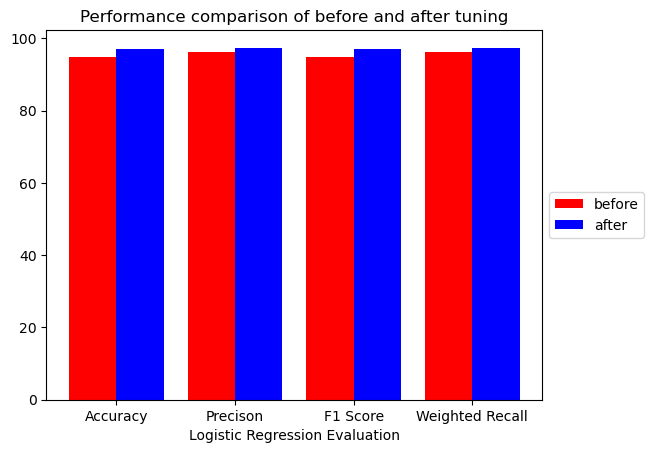

<Figure size 640x1000 with 0 Axes>

In [34]:
import numpy as np
import matplotlib.pyplot as plt

graph_X = ['Accuracy', 'Precison', 'F1 Score', 'Weighted Recall']
Y_b4_tune = [94.74, 96.27, 94.74, 96.12]
Y_aft_tune = [96.95, 97.43, 96.95, 97.41]
X_axis = np.arange(len(graph_X))

plt.bar(X_axis - 0.2, Y_b4_tune, 0.4, label = 'before', color = 'red')
plt.bar(X_axis + 0.2, Y_aft_tune, 0.4, label = 'after', color = 'blue')

plt.xticks(X_axis, graph_X)
plt.xlabel("Logistic Regression Evaluation")
plt.ylabel("")
plt.title("Performance comparison of before and after tuning")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure().set_figheight(10) 
plt.show()

### After tuning, we can see there is a small improvement of performing prediction model.

# Naive bayes

#### pyspark.ml.classification : To define and build Naive Bayes model
#### pyspark.ml.evaluation : To evaluate the designed model with accuracy, precison, F1 score, Weighted Recall

- Accuracy : Describe the number of correct predictions over all predictions
- Precision : A measure of how many of the positive predictions made are correct (true positives)
- F1 Score : A measure combining both precision and recall. It is generally described as the harmonic mean of the two
- Weighted Recall : A measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

### Train Process

1. Build a model using NaiveBayes () and setting parameters as below :
    - Train feature columns
    - Set target column
2. Fit model with training dataset
3. Predict a model with testing dataset using transform()

### Evaluate Process

MulticlassClassificationEvaluator : Evaluator for Multiclass Classification, which expects input columns: prediction, label and weight (optional).

1. Initiate an evaluator with MulticlassClassificationEvaluator()
2. Use the defined evaluator and call evaluate() function :
    * evaluate () : Evaluates the output with optional parameters.
3. Get and print accuracy, precision, F1 score and recall of the built model's performance

# Train Model

In [45]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Naive Bayes classifier
nb = NaiveBayes(featuresCol='features', labelCol='default_ind', predictionCol='prediction')

# Train the model using the pre-processed training data
nb_model = nb.fit(train_data)

# Use the trained model to make predictions on the pre-processed testing data
nb_predictions = nb_model.transform(test_data)

# Evaluate the model's accuracy and test error
nb_evaluator = MulticlassClassificationEvaluator(labelCol="default_ind", predictionCol="prediction", metricName="accuracy")
accuracy_nb = nb_evaluator.evaluate(nb_predictions)
# test_error = 1.0 - accuracy
print("Naive Bayes Model Accuracy: {:.2f}%".format(accuracy_nb * 100))

# Evaluate precision
precision_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "weightedPrecision"})
print("Precision: {:.2f}%".format(precision_nb * 100))

# Evaluate f1 score
f1_score_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "f1"})
print("F1 Score: {:.2f}%".format(f1_score_nb * 100))

# Evaluate weighted recall
weighted_recall_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "weightedRecall"})
print("Weighted Recall: {:.2f}%".format(weighted_recall_nb * 100))

Naive Bayes Model Accuracy: 84.61%
Precision: 95.96%
F1 Score: 88.70%
Weighted Recall: 84.61%


# Fine-tuning Model

* pyspark.ml.tuning : A tool library for tuning ML algorithms and pipelines
* ParamGridBuilder : Builder for a param grid used in grid search-based model selection.
* CrossValidator : K-fold cross validation performs model selection by splitting the dataset into a set of non-overlapping randomly partitioned folds which are used as separate training and test datasets

### TuningProcess

1. Initiate ParamGridBuilder()
2. Add Grid with nb model and setting 'smoothing' into 0.0, 0.2, 0.4, 0.6, 0.8, 1.0

* Data smoothing refers to a statistical approach of eliminating outliers from datasets to make the patterns more noticeable. It is achieved using algorithms to eliminate statistical noise from datasets.

3. Tune the model by initiating CrossValidator() with the following parameters :
- estimator (nb) : algorithm or Pipeline to tune
- estimatorParamMaps : Use the parameters defined above
- evaluator : metric to measure how well a fitted Model does on held-out test data
- Setting the numbers of folds to 5

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

After identifying the best ParamMap, CrossValidator finally re-fits the Estimator using the best ParamMap and the entire dataset.

In [46]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create a Naive Bayes classifier
# nb2 = NaiveBayes(featuresCol='features', labelCol='default_ind', predictionCol='prediction')

# Define a grid of hyperparameters to search over
param_grid = ParamGridBuilder() \
    .addGrid(nb.smoothing, [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) \
    .build()

# Define the cross-validator
cv = CrossValidator(estimator=nb, estimatorParamMaps=param_grid, evaluator=nb_evaluator, numFolds=5)

# Fit the cross-validator to the training data to search over the hyperparameters and find the best model
cv_model = cv.fit(train_data)

# Use the trained model to make predictions on the pre-processed testing data
nb_predictions = cv_model.transform(test_data)

# Evaluate the model's accuracy and test error
accuracy_nb = nb_evaluator.evaluate(nb_predictions)
# test_error = 1.0 - accuracy
print("Naive Bayes Model Accuracy: {:.2f}%".format(accuracy_nb * 100))

# Evaluate precision
precision_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "weightedPrecision"})
print("Precision: {:.2f}%".format(precision_nb * 100))

# Evaluate f1 score
f1_score_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "f1"})
print("F1 Score: {:.2f}%".format(f1_score_nb * 100))

# Evaluate weighted recall
weighted_recall_nb = nb_evaluator.evaluate(nb_predictions, {nb_evaluator.metricName: "weightedRecall"})
print("Weighted Recall: {:.2f}%".format(weighted_recall_nb * 100))

Naive Bayes Model Accuracy: 88.78%
Precision: 92.85%
F1 Score: 90.61%
Weighted Recall: 88.78%


# Compare performance evaluations before tuning and after tuning 

By using simple visualization, we can check improved performance of the model.

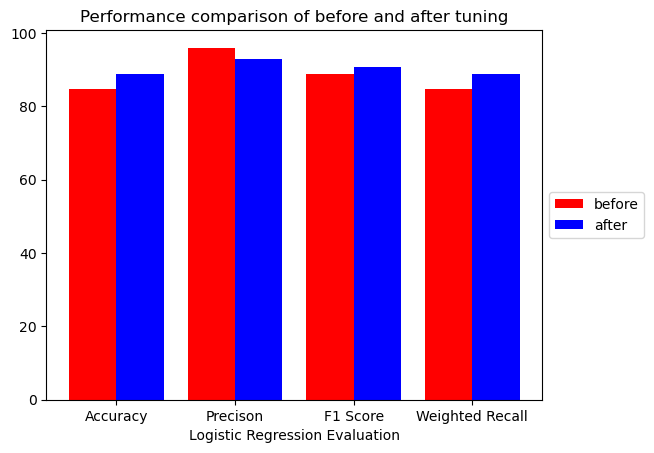

<Figure size 640x1000 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.pyplot as plt

graph_X = ['Accuracy', 'Precison', 'F1 Score', 'Weighted Recall']
Y_b4_tune = [84.61, 95.96, 88.70, 84.61 ]
Y_aft_tune = [88.78, 92.85, 90.61, 88.78]
X_axis = np.arange(len(graph_X))

plt.bar(X_axis - 0.2, Y_b4_tune, 0.4, label = 'before', color = 'red')
plt.bar(X_axis + 0.2, Y_aft_tune, 0.4, label = 'after', color = 'blue')

plt.xticks(X_axis, graph_X)
plt.xlabel("Logistic Regression Evaluation")
plt.ylabel("")
plt.title("Performance comparison of before and after tuning")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure().set_figheight(10) 
plt.show()

### After tuning, we can gain insight that the performance of tuned Naive Bayes has been increased a lot, compared to other 2 models. 

# SVM (Support vector machines)

# Train Model

#### pyspark.ml.classification : To define and build LinearSVCsmodel
#### pyspark.ml.evaluation : To evaluate the designed model with accuracy, precison, F1 score, Weighted Recall

- Accuracy : Describe the number of correct predictions over all predictions
- Precision : A measure of how many of the positive predictions made are correct (true positives)
- F1 Score : A measure combining both precision and recall. It is generally described as the harmonic mean of the two
- Weighted Recall : A measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.

### Train Process

1. Build a model using LinearSVC () and setting parameters as below :
    - Train feature columns
    - Set target column
    - Maximum iteration : 10
2. Fit model with training dataset
3. Predict a model with testing dataset using transform()

### Evaluate Process

MulticlassClassificationEvaluator : Evaluator for Multiclass Classification, which expects input columns: prediction, label and weight (optional).

1. Initiate an evaluator with MulticlassClassificationEvaluator()
2. Use the defined evaluator and call evaluate() function :
    * evaluate () : Evaluates the output with optional parameters.
3. Get and print accuracy, precision, F1 score and recall of the built model's performance

In [39]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train an SVM model
svm = LinearSVC(labelCol="default_ind", featuresCol="features", maxIter=10)
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the accuracy of the SVM model
evaluator_svm = MulticlassClassificationEvaluator(labelCol="default_ind")
accuracy_svm = evaluator_svm.evaluate(svm_predictions)
print("Accuracy of SVM model: {:.2f}%".format(accuracy_svm * 100))

# Evaluate the SVM model using precision, f1 score, and weighted recall
evaluator_svm = MulticlassClassificationEvaluator(labelCol="default_ind", metricName="weightedPrecision")
precision_svm = evaluator_svm.evaluate(svm_predictions)
print("Precision of SVM model: {:.2f}%".format(precision_svm * 100))

evaluator_svm = MulticlassClassificationEvaluator(labelCol="default_ind", metricName="f1")
f1_score_svm = evaluator_svm.evaluate(svm_predictions)
print("F1 Score of SVM model: {:.2f}%".format(f1_score_svm * 100))

evaluator_svm = MulticlassClassificationEvaluator(labelCol="default_ind", metricName="weightedRecall")
weighted_recall_svm = evaluator_svm.evaluate(svm_predictions)
print("Weighted Recall of SVM model: {:.2f}%".format(weighted_recall_svm * 100))

Accuracy of SVM model: 96.81%
Precision of SVM model: 97.41%
F1 Score of SVM model: 96.81%
Weighted Recall of SVM model: 97.33%


# Fine-tuning Model

* pyspark.ml.tuning : A tool library for tuning ML algorithms and pipelines
* ParamGridBuilder : Builder for a param grid used in grid search-based model selection.
* CrossValidator : K-fold cross validation performs model selection by splitting the dataset into a set of non-overlapping randomly partitioned folds which are used as separate training and test datasets

### TuningProcess

1. Initiate ParamGridBuilder()
2. Add Grid with svm model and setting regularization into l1 0.01 and l2 0.1

* Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.

3. Add Grid with lr model and setting maximum iteration 5 and 10

4. Tune the model by initiating CrossValidator() with the following parameters :
- estimator (svm) : algorithm or Pipeline to tune
- estimatorParamMaps : Use the parameters defined above
- evaluator : metric to measure how well a fitted Model does on held-out test data
- Setting the numbers of folds to 3

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

After identifying the best ParamMap, CrossValidator finally re-fits the Estimator using the best ParamMap and the entire dataset.

In [42]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

train_subset = train_data.orderBy(rand()).limit(10000)

# Define the parameter grid to search over
param_grid = ParamGridBuilder() \
    .addGrid(svm.regParam, [0.01, 0.1]) \
    .addGrid(svm.maxIter, [5, 10]) \
    .build()

# Define the cross-validation object
cv = CrossValidator(estimator=svm, estimatorParamMaps=param_grid, evaluator=evaluator_svm, numFolds=3)

# Fit the cross-validation object to the training data
cv_model = cv.fit(train_subset)

# Make predictions on the test data using the best model
cv_predictions = cv_model.transform(test_data)

# Evaluate the accuracy of the best model
cv_accuracy = evaluator_svm.evaluate(cv_predictions)
print("Accuracy of the best SVM model(tuned): {:.2f}%".format(cv_accuracy * 100))

# Evaluate the precision of the best model
evaluator_svm.setMetricName("weightedPrecision")
precision_svm = evaluator_svm.evaluate(cv_predictions)
print("Precision of the best SVM model(tuned): {:.2f}%".format(precision_svm * 100))

# Evaluate the F1 score of the best model
evaluator_svm.setMetricName("f1")
f1_score_svm = evaluator_svm.evaluate(cv_predictions)
print("F1 Score of the best SVM model(tuned): {:.2f}%".format(f1_score_svm * 100))

# Evaluate the weighted recall of the best model
evaluator_svm.setMetricName("weightedRecall")
weighted_recall_svm = evaluator_svm.evaluate(cv_predictions)
print("Weighted Recall of the best SVM model(tuned): {:.2f}%".format(weighted_recall_svm * 100))

Accuracy of the best SVM model(tuned): 97.30%
Precision of the best SVM model(tuned): 97.38%
F1 Score of the best SVM model(tuned): 96.76%
Weighted Recall of the best SVM model(tuned): 97.30%


# Compare performance evaluations before tuning and after tuning 

By using simple visualization, we can check improved performance of the model.

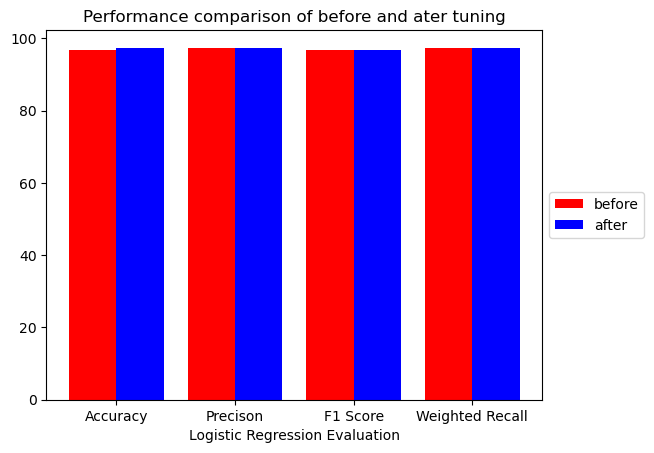

<Figure size 640x1000 with 0 Axes>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

graph_X = ['Accuracy', 'Precison', 'F1 Score', 'Weighted Recall']
Y_b4_tune = [96.81, 97.41, 96.81, 97.33]
Y_aft_tune = [97.30, 97.38, 96.76, 97.30]
X_axis = np.arange(len(graph_X))

plt.bar(X_axis - 0.2, Y_b4_tune, 0.4, label = 'before', color = 'red')
plt.bar(X_axis + 0.2, Y_aft_tune, 0.4, label = 'after', color = 'blue')

plt.xticks(X_axis, graph_X)
plt.xlabel("Logistic Regression Evaluation")
plt.ylabel("")
plt.title("Performance comparison of before and ater tuning")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure().set_figheight(10) 
plt.show()

### After tuning, we can see there is a small improvement of performing prediction.

# Compare Spark MLlib and Scikit-Learn 

### pros/cons or similarity/difference

Scikit-Learn and Spark MLlib are two popular machine learning libraries. 

Scikit-Learn is a Python-based library that is easy to use, provides a range of algorithms and tools, and is suitable for smaller datasets that can be processed on a single machine. 

Spark MLlib, on the other hand, is a distributed machine learning library designed for working with big data, providing scalable implementations of various algorithms that can work on large datasets distributed across a cluster of machines. 

Spark MLlib is generally faster than Scikit-Learn when working with large datasets due to its parallel processing capabilities, while Scikit-Learn is better suited for small to medium-sized datasets. 

### Conclusion

In conclusion, both Spark MLlib and Scikit-Learn are excellent machine learning libraries, and the choice of which one to use will depend on the size of the dataset, the level of parallelism required, and the programming language of choice. Scikit-Learn is better suited for small to medium-sized datasets, while Spark MLlib is designed for working with big data on a distributed cluster